<a href="https://colab.research.google.com/github/genadidharma/pengolahan-citra-dan-visi-komputer/blob/main/Week%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [12]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import math
from google.colab.patches import cv2_imshow
from PIL import Image as im

# Praktikum

1. Membuat fungsi konvolusi

In [13]:
def convolution(image, kernel, stride, padding):

  image = np.pad(image, padding, mode='constant', constant_values=0)

  kernel_height, kernel_width = kernel.shape
  padded_height, padded_width = image.shape

  output_height = (padded_height - kernel_height) // stride + 1
  output_width = (padded_width - kernel_width) // stride + 1

  new_image = np.zeros((output_height, output_width)).astype(np.float32)

  # convolution process
  for y in range(0, output_height):
    for x in range(0, output_width):
      new_image[y][x] = np.sum(image[y * stride:y * stride + kernel_height, x * stride:x * stride + kernel_width] * kernel).astype(np.float32)
      
  return new_image

In [18]:
img = cv.imread('/content/drive/MyDrive/Kuliah/Semester 6/Pengolahan Citra & Visi Komputer/Week 7/Source/mandrill.tiff')
img = cv.resize(img, (300, 300))
img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

2. Image sharpen kernel 1

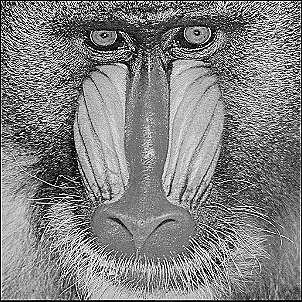

In [19]:
# kernel 1
kernel_shp = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

cv2_imshow(convolution(img, kernel_shp, 1, 2))

3. Image emboss kernel

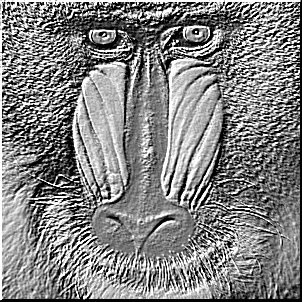

In [20]:
# kernel 2
kernel_ebs = np.array([[-2,-1,0],
                          [-1,1,1],
                          [0,1,2]])

cv2_imshow(convolution(img, kernel_ebs, 1, 2))

4. Image sobel kernel

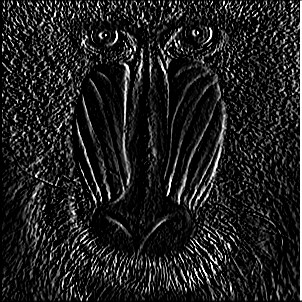

In [21]:
# kernel 3
kernel_sbl = np.array([[1,0,-1],
                         [2,0,-2],
                         [1,0,-1]])
cv2_imshow(convolution(img, kernel_sbl, 1, 2))

5. Image canny kernel

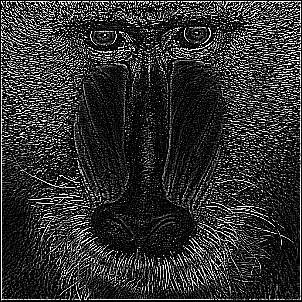

In [22]:
# kernel 4
kernel_cny = np.array([[-1,-1,-1],
                         [-1,8,-1],
                         [-1,-1,-1]])
cv2_imshow(convolution(img, kernel_cny, 1, 2))

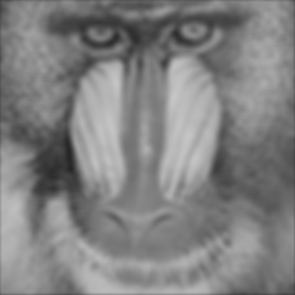

In [26]:
# kernel 5

kernel_size = 10

sigma=math.sqrt(kernel_size)
gaussian_kernel = cv.getGaussianKernel(kernel_size, sigma)
kernel_gau = gaussian_kernel @ gaussian_kernel.transpose()

cv2_imshow(convolution(img, kernel_gau, 1, 2))